## Question 2:
In the second part, we are interested to see if there are any communication channels that are more successful in convincing customers

To answer this, let's first read in all necessary libraries and the train data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Gather

In [2]:
df = pd.read_csv('data/train.csv')
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


## Assess

What is the most frequent communication medium with customers?

In [4]:
df['Policy_Sales_Channel'].value_counts(normalize=True)

152.0    0.353663
26.0     0.209127
124.0    0.194157
160.0    0.057146
156.0    0.027974
           ...   
144.0    0.000003
149.0    0.000003
84.0     0.000003
143.0    0.000003
43.0     0.000003
Name: Policy_Sales_Channel, Length: 155, dtype: float64

We see that channels 152.0, 26.0 and 124.0 account for the top 3 (75%) communication media for outreaching to customers. Let's now look at the total nbr of customers that are interested in a vehicle insurance

In [5]:
df_pos = df[df['Response']==1]

What is the most frequent communication medium for customers that are interested in an insurance? 

In [6]:
df_pos['Policy_Sales_Channel'].value_counts(normalize=True)

26.0     0.340206
124.0    0.299636
152.0    0.082595
156.0    0.049176
157.0    0.038407
           ...   
63.0     0.000021
97.0     0.000021
69.0     0.000021
39.0     0.000021
43.0     0.000021
Name: Policy_Sales_Channel, Length: 121, dtype: float64

Channels 26.0 and 124.0 were the most used ones for outreaching to customers that were interested in a vehicle insurance.

## Analyse

Now, let's look into out main question: Are there any communication channels that are more successful in convincing customers than others? 

In [18]:
### NOTE: This expression works because the variable 'Response'= 0 or 1. ###
df_channels = df.groupby(['Policy_Sales_Channel']).mean()['Response'].sort_values(ascending=False).reset_index(name='Success_Rate')
df_channels.head()
# OR: df_channels = (df_pos['Policy_Sales_Channel'].value_counts()/df['Policy_Sales_Channel'].value_counts()).sort_values(ascending=False).reset_index(name='frequency')

,Policy_Sales_Channel,Success_Rate
0,123.0,1.000000
1,43.0,1.000000
2,27.0,0.333333
3,28.0,0.333333
4,36.0,0.326923


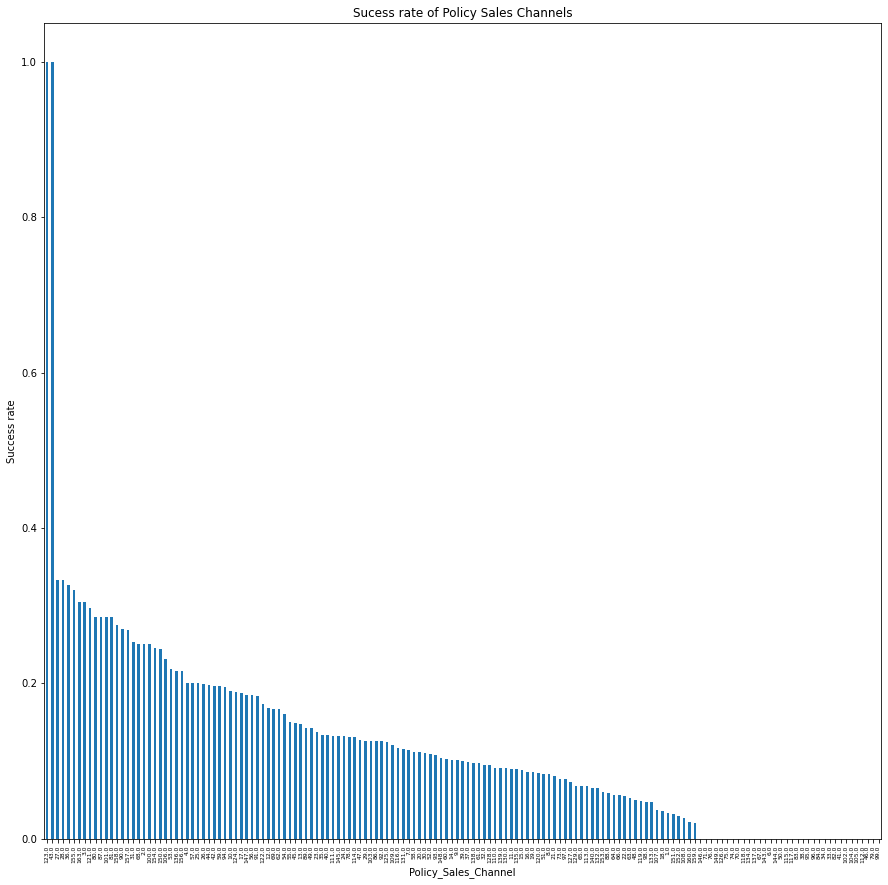

In [19]:
df.groupby(['Policy_Sales_Channel']).mean()['Response'].sort_values(ascending=False).plot(kind='bar',figsize=(15,15));
plt.title('Sucess rate of Policy Sales Channels');
plt.ylabel('Success rate');
plt.xticks(fontsize=6);

The above plot shows that channels 143.0 and 43.0 had the highest success rate even though they were not the most commonly used channels. Now let's make a pie plot for better visualization. The pie plot will consist of 10 wedges. We'll plot each of the first top 9 channels into their own wedge and we'll group all remaining channels in the 10th wedge:

In [8]:
# Top 9 of channels
df_channels5 = df_channels[:9]

# Others (the mean of all the rest)
df_channelsOther = df_channels[9:].mean()

# Array for pie chart
df_channelsPie = df_channels5.append(df_channelsOther,ignore_index=True)
df_channelsPie['Policy_Sales_Channel'][9] = 'Other'
df_channelsPie

,Policy_Sales_Channel,frequency
0,123,1.000000
1,43,1.000000
2,27,0.333333
3,28,0.333333
4,36,0.326923
5,155,0.320097
6,163,0.304183
7,3,0.304015
8,121,0.296875
9,Other,0.101278


## Visualize

Create the pie plot:

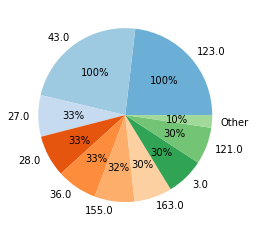

In [9]:
cmap = plt.get_cmap("tab20c")
colors = cmap(np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]))
pers = [p for p in df_channelsPie['frequency']]
total = sum(pers)

plt.pie(df_channelsPie['frequency'], labels=df_channelsPie['Policy_Sales_Channel'], colors=colors, autopct=lambda pers: '{:1.0f}%'.format(pers*total));
#plt.savefig('channels.png',dpi=400)


This plot shows that the top 2 successful channels are channels 123.0 and 43.0 with 100% success rate. Other channels in the top 9 had a maximum of 33% success rate, and channels that followed the top 9 only had a mean success rate of 10%.